### The Income Fluctuation Problem

#### References: 
- https://python.quantecon.org/ifp_advanced.html
- https://www.econforge.org/interpolation.py/

The agent aims to choose a consumption-asset path $\{(c_t,a_t)\}$ to solve
$$
\max \mathbb E \sum_{t=0}^{\infty}
\beta^t u(c_t)
$$
subject to
$$
a_{t+1} = R_{t+1} (a_t - c_t) + Y_{t+1}
\quad \text{and} \quad 
0 \leq c_t \leq a_t
$$
where $(a_0, Z_0)$ is given.
- $R_t$: the gross rate of return on wealth
- $Y_t$: non-financial income
The stochastic components of the problem obey

$$
R_t = R(Z_t,\xi_t)
\quad \text{and} \quad
Y_t = Y(Z_t, \eta_t)
$$
where
- the maps $R$ and $Y$ are time-invariant nonnegative functions,
- the innovation processes $\{\xi_t\}$ and $\{\eta_t\}$ are IID and independent of each other, and
- $\{Z_t\}$ is an irreducible time-homogeneous Markov chain on a finite set $\mathsf Z$.

The Euler equation is
$$
(u'\circ c) (a,z) = \max \left\{
    \beta \, \mathbb E_z \hat R (u'\circ c)\left[
        \hat R (a - c(a,z)) + \hat Y, \hat Z
    \right], u'(a)
\right\}
$$
Fix $\sigma \in \mathscr C$, Tc(a,z) solves:
$$
(u'\circ (Tc))(a,z) = \max \left\{
    \beta \mathbb E_z \hat R (u'\circ c) \left[
        \hat R (a - Tc(a,z)) + \hat Y, \hat Z
    \right], u'(a)
\right\}
$$

#### Standard Algorithm
\begin{align}
    &\text{Setting up a grid for asset } \{a_i\}_{i=1}^N \\
    \quad \Longrightarrow \quad & \text{Given each } a_i, \text{ solve for }Tc(a_i, z) \\
    \quad \Longrightarrow \quad &\text{Need numerical optimization in each loop}
\end{align}

#### Endogenous Grid Algorithm
\begin{align}
    &\text{Setting up a grid for saving } \{s_i\}_{i=1}^N \\
    \quad \Longrightarrow \quad &\text{Given each } s_i , \text{ compute } 
        (u'\circ (Tc))(a_i,z) = \beta \mathbb E_z \hat R (u'\circ c) \left[
            \hat R s_i + \hat Y, \hat Z
        \right] \\
     \quad \Longrightarrow \quad &\text{Compute endogenous asset grid } a_i = s_i + Tc(a_i,z) \\
     \quad \Longrightarrow \quad &\text{Avoid numerical optimization within loops, improve efficiency!}
\end{align}

#### Numerical Example
The utility function is CRRA:
$$
u(c) = \begin{cases}
    \frac{c^{1-\gamma}}{1-\gamma}, & \text{if } \gamma>0, \gamma \neq 1\\
    \log c, & \text{if } \gamma = 1
\end{cases}
$$

The exogenous state $\{Z_t\}$ is a Markov chain with transition probability $P$, and 

$$
R_t = \exp(a_r \xi_t + b_r), \quad
\{\xi_t\} \overset{iid}{\sim} N(0,1)
$$
and
$$
Y_t = \exp(a_y \eta_t + Z_t b_y), \quad
\{\eta_t\} \overset{iid}{\sim} N(0,1).
$$

In [5]:
run optimality

In [6]:
ifp = IFP()
a_init, c_init = initialize(ifp)
a_opt, c_opt, k = solve_model_time_iter(ifp, T, a_init, c_init)

Error at iteration 50 is 0.31895583840562836
Error at iteration 100 is 0.021876643979439336
Error at iteration 150 is 0.0004667516871279531

Converged in 167 iterations.


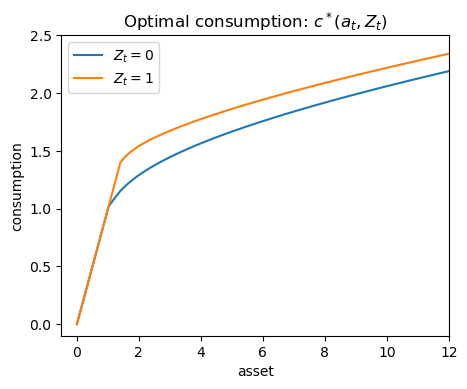

In [7]:
fig, ax = plt.subplots(figsize=(5,3.9))
labs = [f'$Z_t={ifp.z_vals[0]:.0f}$', f'$Z_t={ifp.z_vals[1]:.0f}$']
for i in range(len(ifp.P)):
    ax.plot(a_opt[:,i], c_opt[:,i], label=labs[i])
ax.set_ylim(-0.1,2.5)
ax.set_xlim(-0.5,12)
ax.set_xlabel('asset')
ax.set_ylabel('consumption')
ax.legend()
plt.title('Optimal consumption: $c^*(a_t,Z_t)$')
plt.show()

In [10]:
a_opt, c_opt

(array([[0.00000000e+00, 0.00000000e+00],
        [1.01263093e+00, 1.39885359e+00],
        [1.01323617e+00, 1.39935982e+00],
        ...,
        [1.03195747e+03, 1.03203483e+03],
        [1.03275786e+03, 1.03283522e+03],
        [1.03355887e+03, 1.03363623e+03]]),
 array([[ 0.        ,  0.        ],
        [ 1.01230645,  1.39852911],
        [ 1.01258696,  1.39871061],
        ...,
        [33.51379048, 33.59114834],
        [33.53632326, 33.6136791 ],
        [33.55887314, 33.63622697]]))